Original version of the source code is from Prof. Ben Leong. It is revised for IT5005   

# Logic Gate Modeling

This notebook complements the lecture slides. We dont need pytorch

Here, we present to you the code for the original Perceptron by Rosenblatt (1958). 

Perceptron learning using numpy

1. We need the following numpy
       np.logical_and   -> logical AND  operator
       np.logical_or   -> logical OR  operator
       np.logical_not   -> logical NOT  operator


   
       

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

## sign_function

1. `z >= 0 - np.finfo(float).eps`: Compares each element of `z` with 0 subtracted by a very small eps (epsillon) value. The epsilon value is obtained using `np.finfo(float).eps`, which represents the smallest representable positive number such that `1.0 + eps != 1.0`. It is used to handle floating-point errors.

2. `.reshape(z.shape)`: To reshapes array to have the same shape as `z`.

3. `.astype(int)`: Converts the array to an integer array; (True is represented as 1 and False is represented as 0)

if each element in `z` is non-negative and returns an array of 1s and 0s accordingly.

In [2]:
#if element of z is greater than 0, it returns 1 at that index, otherwise returns 0 at the corresponding index
def sign_function(z:np.ndarray):
    # due to rounding errors, we require that z >= 0 - eps
    #`np.finfo(float).eps` represents the smallest representable positive number such that `1.0 + eps != 1.0`
    return (z >= 0 - np.finfo(float).eps).reshape(z.shape).astype(int)

# Testing sign function
sign_function(np.array([-1,0,1,-2]))

array([0, 1, 1, 0])

## Perceptron Learning Algorithm

In [3]:
def perceptron_learning_algorithm(x, y, w=None, lr=0.1, iters=10):
    """Return perceptron model weights trained by Perceptron Update:

    w <- w + lr * (y - sign(w * x)) * x

    Parameters
        x: feature array of shape `(N, D)`, where `N` is number of samples and
            `D` is number of features.
        y: label array of shape `(N, 1)`.
        w: perceptron model weights of shape `(1, 1+D)`, (b, w1, w2, ..., w_D).
            Default: np.zeros([3]).
        lr: learning rate. Default: 0.1.
        iters: number of iterations. Default: 10.
        verbose: whether it prints out the update process. Default: False.
        need_step: whether it returns the update process. Default: False.
    """
    if w is None:
        #w = np.zeros([1, np.size(x[0]) + 1]) # + 1 for bias
        w = np.random.rand(1, np.size(x[0]) + 1) # + 1 for bias
    #if np.size(x[0] == 1):
    #    x = np.concatenate((np.ones([len(x), 1]), x.reshape(-1,1)), axis=1)
    if x.ndim == 1:
        x = x.reshape(-1,1)
    x = np.concatenate((np.ones([len(x), 1]), x), axis=1) # concat 1 for bias
    weights = [w.copy()]
    for iter in range(iters):
        for i in range(len(x)):
            out = np.inner(w, x[i])
            label = sign_function(out)
            if label != y[i]:
                w = w + lr * (y[i] - label) * x[i]
                weights.append(w.copy())
    return np.array(weights)


In [4]:
def plot_gate(weights, inputs, outputs, title='Logic Gate'):
    fig, ax = plt.subplots()

    if inputs.ndim == 1 or inputs.shape[1] == 1:
        inputs = inputs.reshape(-1, 1)
        ax.plot(inputs[outputs==0, 0], np.zeros_like(inputs[outputs==0, 0]), 'bo', label='0')
        ax.plot(inputs[outputs==1, 0], np.zeros_like(inputs[outputs==1, 0]), 'ro', label='1')
        ax.axis([-0.5, 1.5, -0.5, 0.5])
        ax.set_xlabel('Input')
        ax.set_ylabel('Output')
    else:
        ax.plot(inputs[outputs==0, 0], inputs[outputs==0, 1], 'bo', label='0')
        ax.plot(inputs[outputs==1, 0], inputs[outputs==1, 1], 'ro', label='1')
        ax.axis([-0.5, 1.5, -0.5, 1.5])
        ax.set_xlabel('Input A')
        ax.set_ylabel('Input B')

    ax.set_title(title)
    ax.legend()

    line, = ax.plot([], [], 'k-', lw=2)

    def init():
        line.set_data([], [])
        return line,

    def animate(i):
        w = weights[i][0]
        x = np.array([-0.5, 1.5])
        if inputs.shape[1] == 1:
            y = -(w[0] + w[1] * x) / 1
        else:
            y = -(w[0] + w[1] * x) / w[2]
        line.set_data(x, y)
        return line,

    anim = FuncAnimation(fig, animate, init_func=init, frames=len(weights), interval=500, blit=True)
    return HTML(anim.to_jshtml())


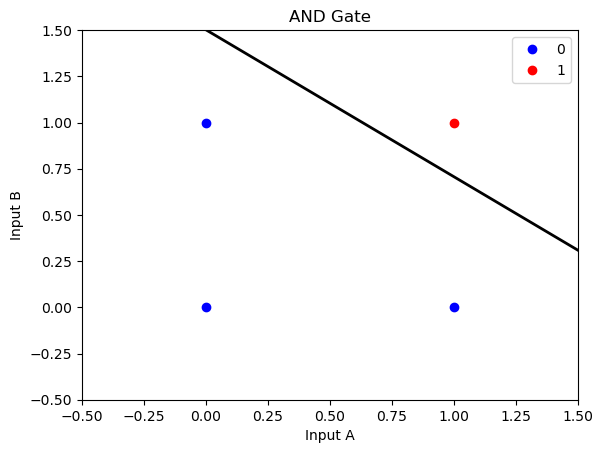

In [5]:
# Example usage:
x_logic_2 = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])

# For AND gate
y_logic_AND = np.logical_and(x_logic_2[:,0], x_logic_2[:,1]).astype(int)

weights_AND = perceptron_learning_algorithm(x_logic_2, y_logic_AND)

HTML_video_AND = plot_gate(weights_AND, x_logic_2, y_logic_AND, title='AND Gate')
HTML_video_AND

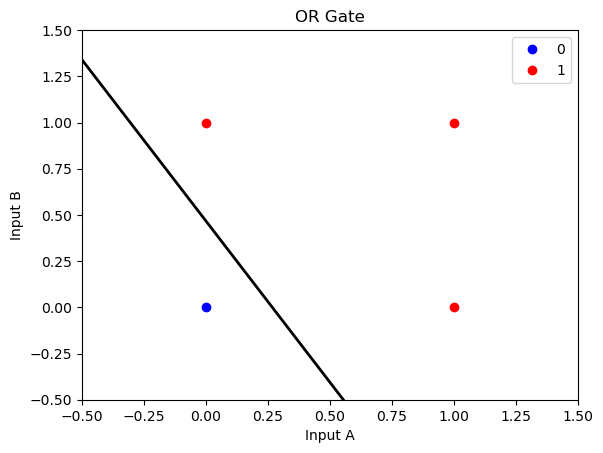

In [6]:
# For OR gate
y_logic_OR = np.logical_or(x_logic_2[:,0], x_logic_2[:,1]).astype(int)

weights_OR = perceptron_learning_algorithm(x_logic_2, y_logic_OR)

HTML_video_OR = plot_gate(weights_OR, x_logic_2, y_logic_OR, title='OR Gate')
HTML_video_OR

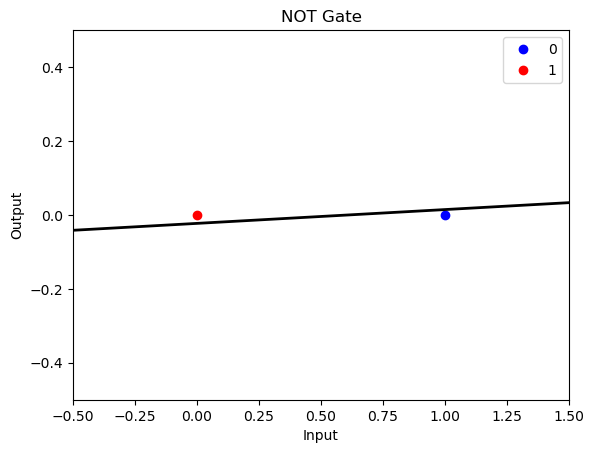

In [7]:
# Example usage:
x_logic_1 = np.array([0, 1])

# For NOT gate
y_logic_NOT = np.logical_not(x_logic_1).astype(int)

weights_NOT = perceptron_learning_algorithm(x_logic_1, y_logic_NOT)

HTML_video_NOT = plot_gate(weights_NOT, x_logic_1, y_logic_NOT, title='NOT Gate')
HTML_video_NOT

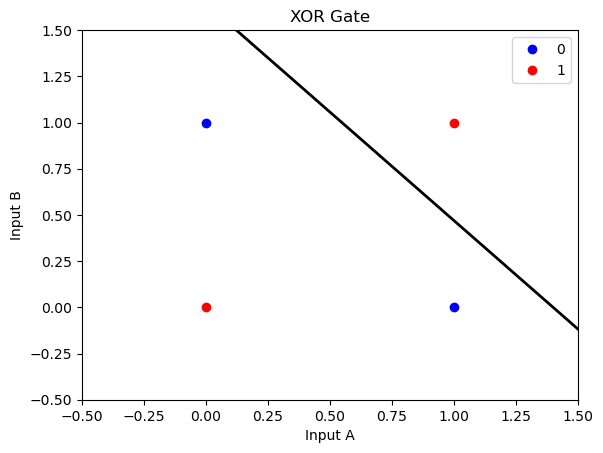

In [10]:
# For XNOR gate
y_logic_XNOR = np.logical_not(np.logical_xor(x_logic_2[:,0],x_logic_2[:,1]).astype(int))

weights_xnor = perceptron_learning_algorithm(x_logic_2, y_logic_XNOR)

HTML_video_xnor = plot_gate(weights_xnor, x_logic_2, y_logic_XNOR, title='XOR Gate')
HTML_video_xnor